In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
con = sqlite3.connect('disgenet.db')

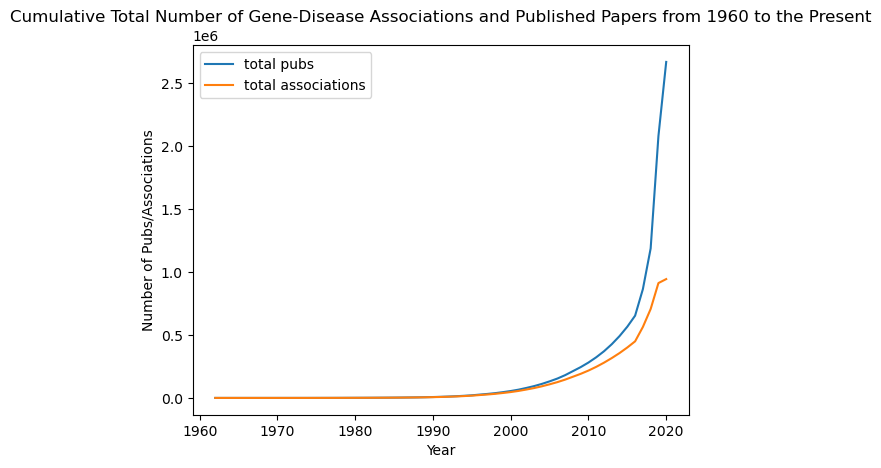

In [3]:
# performed the following query in sql to obtain the cumulative publications and associations
'''drop view if exists cumulative_data

create view cumulative_data as
select last_year, num_pubs
from disgenet 
where last_year != ' ' and last_year != 0 and last_year >= 1960


drop view if exists pubs_and_associations

create view pubs_and_associations as
select last_year, 
sum(num_pubs) as total_pubs,
count(*) as num_associations
from cumulative_data
group by last_year

select * from disgenet
where last_year != ' '
group by num_pubs 
order by num_pubs desc'''

cumulative_data_query = 'select * from pubs_and_associations'

df = pd.read_sql_query(cumulative_data_query, con)
df.total_pubs = df.total_pubs.cumsum()
df.num_associations = df.num_associations.cumsum()
plt.plot(df.last_year, df.total_pubs, label='total pubs')
plt.plot(df.last_year, df.num_associations, label='total associations')
plt.title('Cumulative Total Number of Gene-Disease Associations and Published Papers from 1960 to the Present')
plt.xlabel('Year')
plt.ylabel('Number of Pubs/Associations')
plt.legend()

April 14, 2003 marks the completion of the Human Genome Project. The Human Genome Project was a decade long research endeavor with the goal of better understanding the human genetic makeup. Researchers sequenced and recorded the purposes and functionalities of the human DNA to produce a revolutionary blueprint of the human genome. The completion of this internationally collaborative project provided a broad foundation and excellent resource for genetic research in biology, biochemistry, medicine, drug discovery, diagnostics, etc. It facilitated many novel discoveries in the aforementioned fields. The visual above demonstrates the cumulative total number of gene-to-disease associations from 1960 to the present, and the cumulative total number of gene-to-disease related publications in that same time frame. It is evident that the rate of both the number of established associations and publications increases tremendously beginning around the early 2000s- aligning with the completion of the Human Genome Project in 2003. 

In [4]:
# top ten genes

# performed the following query in sql to obtain the top ten genes according to the number of associations
'''drop view if exists gene_analysis

create view gene_analysis as
select gene_name, disease_type, num_pubs
from disgenet
where disease_type != 'group'

drop view if exists top_ten_genes

create view top_ten_genes as
select gene_name,
count(*) as num_associations,
sum(num_pubs) as total_pubs
from gene_analysis
group by gene_name
order by num_associations desc
limit 10'''

top_ten_genes_query = 'select * from top_ten_genes'

df = pd.read_sql_query(top_ten_genes_query, con)
df

,gene_name,num_associations,total_pubs
0,tumor necrosis factor,2489,18030.0
1,tumor protein p53,2290,32482.0
2,interleukin 6,2140,12912.0
3,vascular endothelial growth factor A,1712,13881.0
4,interleukin 1 beta,1603,7972.0
5,tRNA,1534,273.0
6,interleukin 10,1496,6852.0
7,transforming growth factor beta 1,1413,6971.0
8,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",1364,10434.0
9,interferon gamma,1347,5329.0


In [5]:
# top ten diseases

# performed the following query in sql to obtain the top ten diseases according to the number of associations
'''drop view if exists disease_analysis

create view disease_analysis as
select disease_name, disease_type, num_pubs
from disgenet
where disease_type != 'group'

drop view if exists top_ten_diseases

create view top_ten_diseases as
select disease_name,
count(*) as num_associations,
sum(num_pubs) as total_pubs
from disease_analysis
group by disease_name
order by num_associations desc
limit 10'''

top_ten_diseases_query = 'select * from top_ten_diseases'

df = pd.read_sql_query(top_ten_diseases_query, con)
df

,disease_name,num_associations,total_pubs
0,Malignant neoplasm of breast,6941,57731.0
1,Breast Carcinoma,6776,57145.0
2,Tumor Cell Invasion,6626,44915.0
3,Neoplasm Metastasis,6385,43596.0
4,Carcinogenesis,6243,37214.0
5,Liver carcinoma,5725,29369.0
6,Colorectal Carcinoma,5473,28072.0
7,Malignant neoplasm of prostate,4502,27691.0
8,Prostate carcinoma,4388,26813.0
9,Malignant neoplasm of lung,4173,19312.0


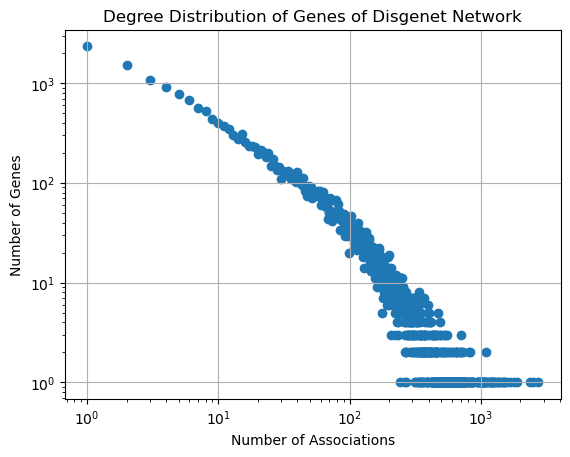

In [6]:
# gene degree distribution

# performed the following query in sql to obtain the degree distribution of genes
'''drop view if exists gene_associations

create view gene_associations as
select 
gene_symbol,
count(*) as num_associations
from disgenet
group by gene_symbol

drop view if exists gene_degree_distribution

create view gene_degree_distribution as
select
num_associations,
count(*) as frequency
from gene_associations 
group by num_associations'''

gene_degree_distribution_query = 'select * from gene_degree_distribution'

df = pd.read_sql_query(gene_degree_distribution_query, con)

plt.scatter(df.num_associations, df.frequency)
plt.title('Degree Distribution of Genes of Disgenet Network')
plt.xlabel('Number of Associations')
plt.ylabel('Number of Genes')
plt.xscale('log')
plt.yscale('log')
plt.grid()

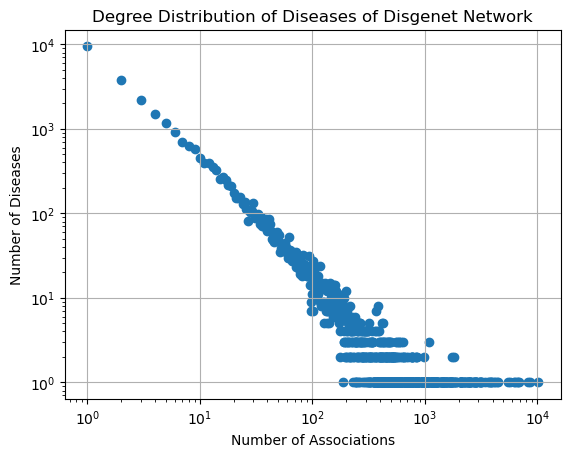

In [7]:
# disease degree distribution

# performed the following query in sql to obtain the degree distribution of genes
'''drop view if exists disease_associations

create view disease_associations as
select
disease_name,
count(*) as num_associations
from disgenet
group by disease_name

drop view if exists disease_degree_distribution 

create view disease_degree_distribution as
select
num_associations,
count(*) as frequency
from disease_associations 
group by num_associations'''

disease_degree_distribution_query = 'select * from disease_degree_distribution'

df = pd.read_sql_query(disease_degree_distribution_query, con)

plt.scatter(df.num_associations, df.frequency)
plt.title('Degree Distribution of Diseases of Disgenet Network')
plt.xlabel('Number of Associations')
plt.ylabel('Number of Diseases')
plt.xscale('log')
plt.yscale('log')
plt.grid()

In [8]:
# performed the following query in sql to obtain the 300+ genes that are strongly associated with Alzheimer’s Disease 
'''drop view if exists alz_genes

create view alz_genes as
select * from disgenet
where disease_name like '%Alzheimer%' and EI >= 0.667 and num_pubs >= 11

drop view if exists aggregated_alz_genes

create view aggregated_alz_genes as
select gene_id,
gene_symbol,
DSI,
DPI,
EI,
sum(num_pubs) as total_pubs
from alz_genes
group by gene_symbol
order by total_pubs desc'''

# table only displays top ten with the most total publications
alz_genes_query = 'select * from aggregated_alz_genes limit 10'

df = pd.read_sql_query(alz_genes_query, con)
df

,gene_id,gene_symbol,DSI,DPI,EI,total_pubs
0,348.0,APOE,0.338,0.962,0.9600,3663.0
1,351.0,APP,0.422,0.846,0.9840,3184.0
2,5663.0,PSEN1,0.469,0.846,0.9576,1518.0
3,4137.0,MAPT,0.445,0.923,1.0000,1045.0
4,23621.0,BACE1,0.559,0.769,0.9852,490.0
5,43.0,ACHE,0.445,0.885,0.9845,390.0
6,5664.0,PSEN2,0.550,0.654,1.0000,384.0
7,590.0,BCHE,0.447,0.923,0.9091,359.0
8,1437.0,CSF2,0.330,0.962,0.9660,294.0
9,3918.0,LAMC2,0.389,0.923,0.9654,289.0


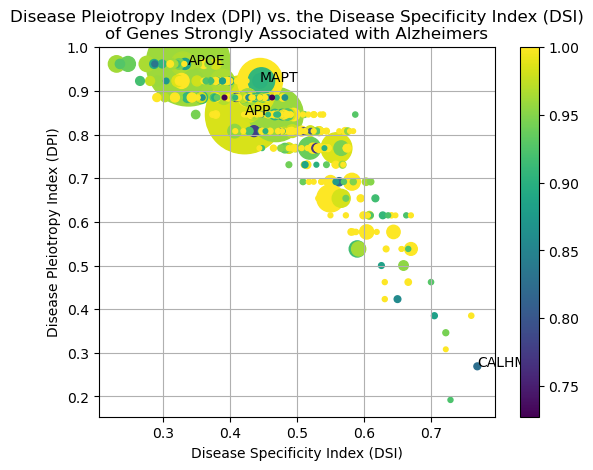

In [9]:
alz_genes_query = 'select * from aggregated_alz_genes'

df = pd.read_sql_query(alz_genes_query, con)

def label_points(gene_name):
    gene_index = df.index[df['gene_symbol'] == gene_name][0]
    gene_DSI = df.at[gene_index, 'DSI']
    gene_DPI = df.at[gene_index, 'DPI']
    plt.text(gene_DSI, gene_DPI, gene_name) 

label_points('APOE')
label_points('APP')
label_points('MAPT')
label_points('CALHM1')

plt.scatter(df.DSI, df.DPI, c=df.EI, s=df.total_pubs, cmap='viridis')

plt.title('Disease Pleiotropy Index (DPI) vs. the Disease Specificity Index (DSI)\n\
of Genes Strongly Associated with Alzheimers')
plt.xlabel('Disease Specificity Index (DSI)')
plt.ylabel('Disease Pleiotropy Index (DPI)')
plt.colorbar()
plt.grid()

In [10]:
# performed the following query in sql to obtain the biological processes that Alzheimer’s-linked genes 
# are most frequently involved in
'''drop view if exists updated_go

create view updated_go as
select distinct gene_id, go_id, qualifier, go_term
from go_human
where category = 'Process'

drop view if exists initial_join

create view initial_join as
select * from updated_go join aggregated_alz_genes using (gene_id)'''

bio_processes_query = 'select go_id, qualifier, go_term, count(*) as num_genes\
 from initial_join\
 group by go_id\
 order by num_genes desc\
 limit 10'

df = pd.read_sql_query(bio_processes_query, con)
df

,go_id,qualifier,go_term,num_genes
0,GO:0010628,involved_in,positive regulation of gene expression,57
1,GO:0007165,involved_in,signal transduction,52
2,GO:0045944,involved_in,positive regulation of transcription by RNA po...,50
3,GO:0043066,involved_in,negative regulation of apoptotic process,42
4,GO:0010629,involved_in,negative regulation of gene expression,39
5,GO:0006468,involved_in,protein phosphorylation,37
6,GO:0008284,involved_in,positive regulation of cell population prolife...,36
7,GO:0045893,involved_in,positive regulation of DNA-templated transcrip...,34
8,GO:0006915,involved_in,apoptotic process,34
9,GO:0000122,involved_in,negative regulation of transcription by RNA po...,34


In [11]:
# performed the following query in sql to obtain the other diseases Alzheimer's genes are also associated with
'''create view alz as
select gene_id, gene_symbol from aggregated_alz_genes aag

drop view if exists initial_other_diseases

create view initial_other_diseases as
select * from disgenet join alz using (gene_id)
where disease_type != 'group'
and EI >= 0.667 and num_pubs >= 11'''

other_diseases_query ='select\
 disease_name,\
 count(*) as num_alz_genes\
 from initial_other_diseases \
 group by disease_name\
 order by num_alz_genes desc\
 limit 10'

df = pd.read_sql_query(other_diseases_query, con)
df

,disease_name,num_alz_genes
0,Alzheimer's Disease,314
1,Malignant neoplasm of breast,124
2,Breast Carcinoma,123
3,Neoplasm Metastasis,109
4,Tumor Cell Invasion,101
5,Liver carcinoma,97
6,Carcinogenesis,95
7,Parkinson Disease,81
8,Atherosclerosis,78
9,"Diabetes Mellitus, Non-Insulin-Dependent",77


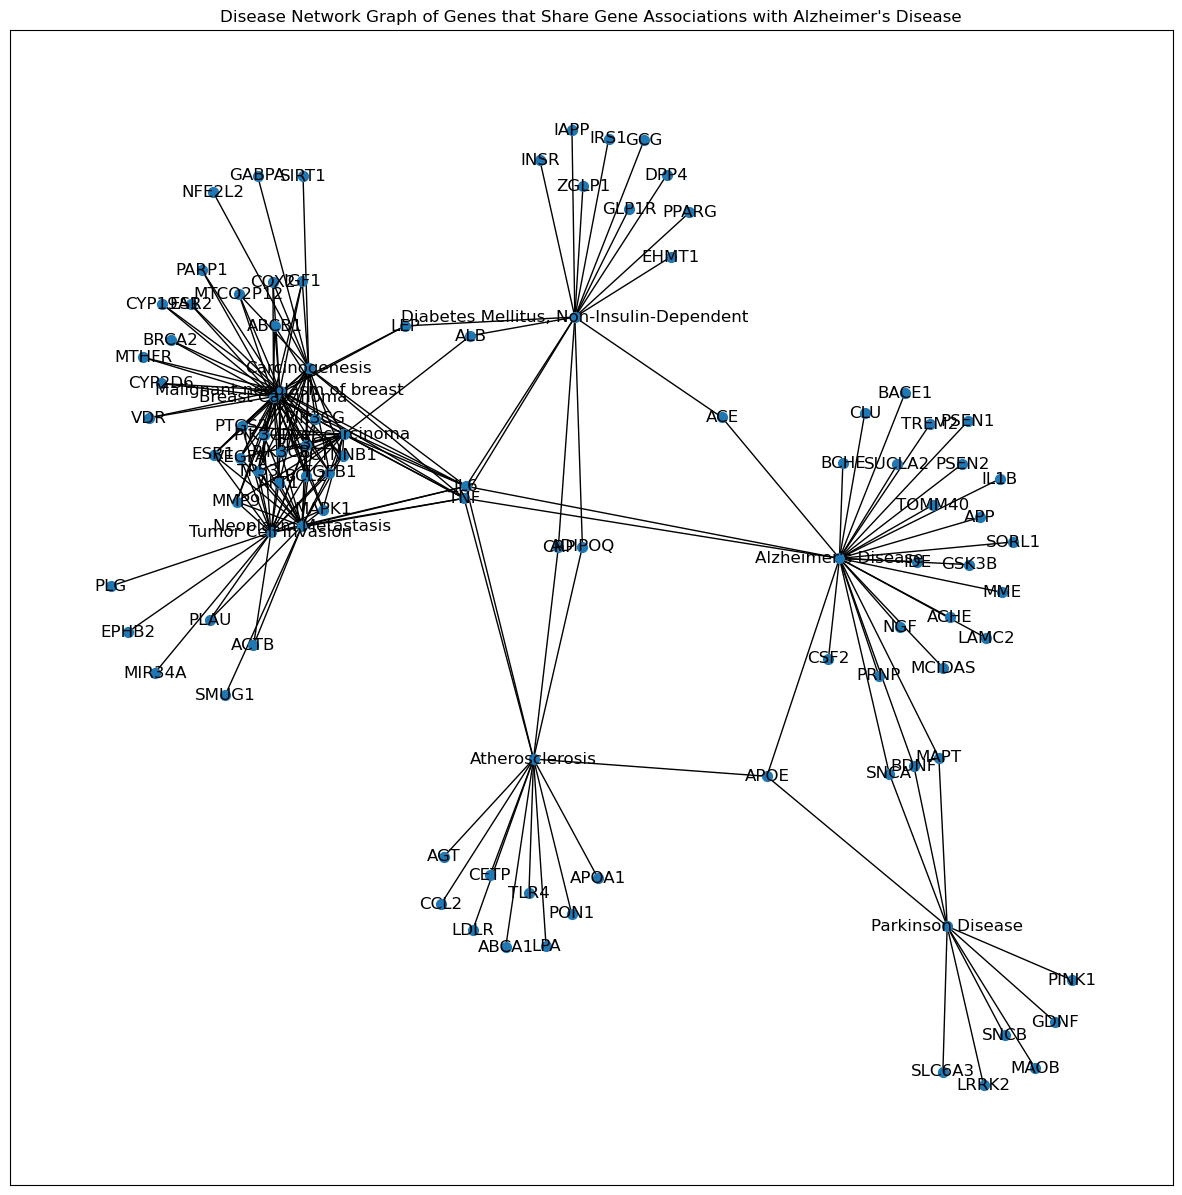

In [12]:
# performed the following query in sql to obtain the Alzheimer’s genes and the top-10 Alzheimer’s-related diseases 
# associations ranked by num_pubs
'''drop view if exists query1

create view query1 as
select * from disgenet join aggregated_alz_genes using (gene_id)

select * from query1

drop view if exists query2

create view query2 as
select * from query1 join top_ten_other_diseases using (disease_name)
order by num_pubs desc'''

graph_query ='select gene_symbol, disease_name, num_pubs from query2 limit 200'

net = pd.read_sql_query(graph_query, con)

plt.figure(figsize=(15,15), dpi=100)
plt.title('Disease Network Graph of Genes that Share Gene Associations with Alzheimer\'s Disease')
G = nx.from_pandas_edgelist(net, 'gene_symbol', 'disease_name', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=True, node_size=50)

In [13]:
# performed the following query in sql to obtain the genes associated with Celiacs and Schizophrenia
'''create view genes as
select * from disgenet
where (disease_name like '%Celiac%' or disease_name like '%Schizophrenia%') and EI >= 0.667 and num_pubs >= 11'''

graph_query ='select * from genes'

net = pd.read_sql_query(graph_query, con)

plt.figure(figsize=(30,30), dpi=100)
plt.title('Gene Network Graph of Celiac Disease and Schizophrenia Gene Associations', fontsize = 40)
G = nx.from_pandas_edgelist(net, 'gene_symbol', 'disease_name', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=True, node_size=75, font_size=25)

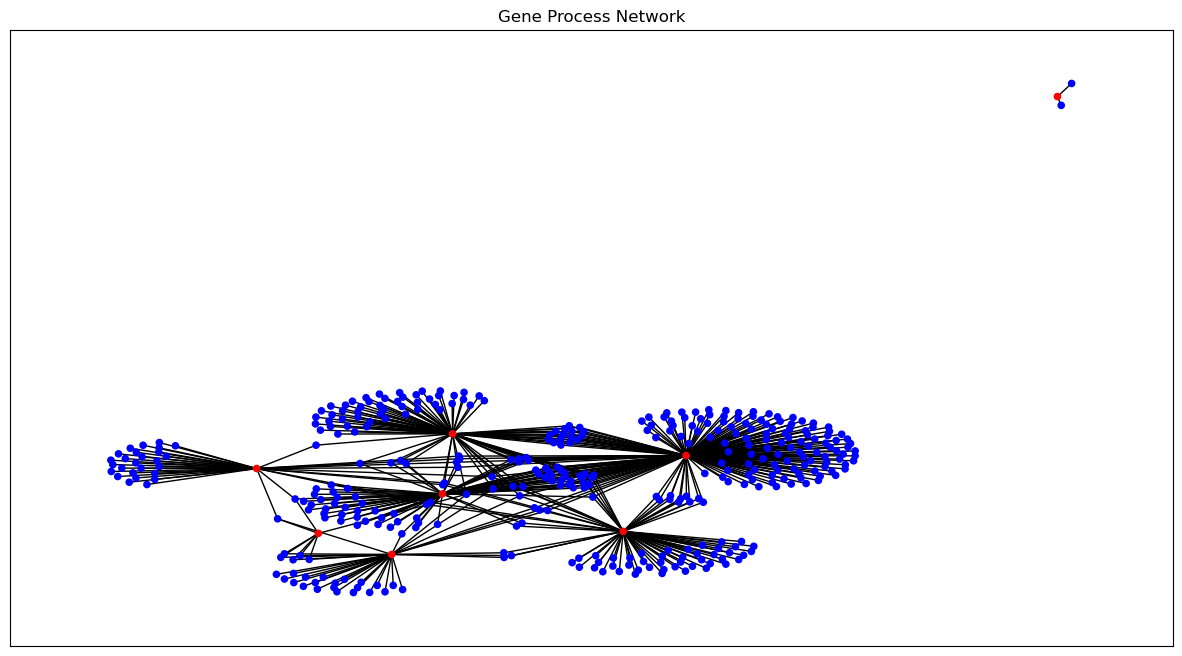

In [14]:
# performed the following query in sql to obtain the genes associated with Celiacs and Schizophrenia
'''create view genes as
select * from disgenet
where (disease_name like '%Celiac%' or disease_name like '%Schizophrenia%') and EI >= 0.667 and num_pubs >= 11

create view genes2 as
select 
gene_id,
gene_symbol,
count(*) as association
from genes
group by gene_id

create view common_genes as
select * from genes2 where association = 2'''

graph_query ='select gene_id, go_term\
 from go_human join common_genes using(gene_id)\
 where category = \'Process\''

net = pd.read_sql_query(graph_query, con)

plt.figure(figsize=(15,8), dpi=100)
plt.title('Gene Process Network')
G = nx.from_pandas_edgelist(net, 'gene_id', 'go_term', create_using=nx.Graph())

def get_node_color(category):
    if isinstance(category, str):
        return 'blue'
    else:
        return 'red'
    
node_colors = [get_node_color(node) for node in G.nodes]
    
nx.draw_networkx(G, with_labels=False, node_size=20, node_color=node_colors, font_size=25)

In [15]:
table_query = 'select go_term, count(*) as frequency\
 from go_human join common_genes using(gene_id)\
 where category = \'Process\'\
 group by go_term\
 order by frequency desc\
 limit 10'

df = pd.read_sql_query(table_query, con)
pd.set_option('display.max_colwidth', 500)
df

,go_term,frequency
0,positive regulation of gene expression,16
1,positive regulation of transcription by RNA polymerase II,9
2,positive regulation of tyrosine phosphorylation of STAT protein,6
3,positive regulation of cell population proliferation,6
4,positive regulation of NF-kappaB transcription factor activity,6
5,positive regulation of DNA-templated transcription,6
6,negative regulation of gene expression,6
7,immune response,6
8,positive regulation of receptor signaling pathway via JAK-STAT,5
9,positive regulation of interleukin-8 production,5
